# Training a CNN on Fashion MNIST with PyTorch


### Data Loading and Preprocessing
- **Import** the necessary packages and set the device to GPU if available.
- **Download the Fashion MNIST dataset** and load it using PyTorch's DataLoader.
- **Preprocess the data** by normalizing the pixel values and creating training and validation datasets.

###  Exploratory Data Analysis (EDA)
- **Visualize sample images** from the Fashion MNIST dataset to understand the data distribution.
- Display some images from each class to get a sense of the data.

###  Building the CNN Model
- **Define the architecture** of the CNN model using PyTorch's **nn.Module** class.
- **Create a model** with Convolutional layers, Batch Normalization, ReLU activation, MaxPooling, and Fully Connected layers.
- Introduce dropout layers to the model for regularization.

###  Defining Loss Function and Optimizer
- Define the **loss function** (e.g., CrossEntropyLoss) and the **optimizer** (e.g., SGD) for training the model.
- Include **L2 regularization** (weight decay) in the optimizer if desired.

###  Model Training
- Implement the training loop with forward and backward passes, and update the model parameters using the optimizer.
- **Monitor and record** training loss and accuracy during each epoch.

###  Model Evaluation
- Evaluate the trained model on the **validation dataset** and calculate its accuracy.
- **Compare** the performance of the model **with and without regularization**.

###  Experimenting with Hyperparameters
- Experiment with different hyperparameters such as **learning rate**, **batch size**, **number of epochs**, and **regularization strength**.
- Observe the effects of these changes on the model's **performance and overfitting** tendencies.

###  Data Augmentation
- Introduce data augmentation techniques like random **rotations, translations, and flips** to improve model generalization.
- **Visualize some augmented images** to see how they differ from the original data.



# Import Libraries

1. `import torch`: Imports the main PyTorch package.

2. `import PIL`: PIL is a library used for opening, manipulating, and saving image files.

3. `import torchvision`: Imports the torchvision library, which is built on top of PyTorch and provides various datasets, model architectures, and image transformation utilities.

4. `import torchvision.transforms as transforms`: This module provides various image transformations, such as resizing, cropping, and data augmentation.

5. `import torch.optim as optim`: Imports the `optim` module from PyTorch. This module includes various optimization algorithms, such as Stochastic Gradient Descent (SGD), Adam, etc.

6. `import torch.nn as nn`: This module provides various neural network layers and loss functions for building deep learning models.

In [18]:
import torch 
import PIL

import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn as nn

In [19]:
device = ('cuda')
print(f"GPU is available: {torch.cuda.is_available()}")

GPU is available: True


# Convert Images
1. `transforms.ToTensor()`: Converts the input PIL Image or numpy array to a **PyTorch tensor**. This transformation converts the image data from the range [0, 255] to a normalized tensor in the range [0, 1]. The image channels are also reordered from (H, W, C) to (C, H, W).

2. `transforms.Normalize(0.5, 0.5)`: Applies mean and standard deviation normalization to the input tensor. The mean and standard deviation values used here are 0.5 each. This transformation shifts the tensor data to have a mean of 0 and a standard deviation of 1, effectively normalizing the tensor to a range of approximately [-1, 1].

The `transforms.Compose` function allows you to **chain multiple transformations together** into a single pipeline. When you apply this transformation pipeline to an image, it will first convert the image to a tensor and then normalize the tensor using the specified mean and standard deviation.

In [20]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(0.5,0.5) ])

1. `train = torchvision.datasets.FashionMNIST(root='/data', train=True, download=True, transform=transform)`: 
   - `root`: Specifies the **directory** where the dataset will be downloaded (if not already available) and saved.
   - `train=True`: Indicates that this is the **training set**.
   - `download=True`: **Downloads** the dataset if it is not already available in the specified root directory.
   - `transform=transform`: Applies the defined **`transform` pipeline** to preprocess the data before loading it.

2. `test = torchvision.datasets.FashionMNIST(root='/data', train=False, download=True, transform=transform)`: 
   - `root`: Specifies the directory where the dataset will be downloaded (if not already available) and saved.
   - `train=False`: Indicates that this is the **testing (validation) set**.
   - `download=True`: Downloads the dataset if it is not already available in the specified root directory.
   - `transform=transform`: Applies the same `transform` pipeline used for the training set to preprocess the test set.

By loading the dataset with these configurations, you will have two variables: `train` and `test`, which are `torchvision.datasets.Dataset` objects. These objects contain the Fashion MNIST data split into training and testing sets, and each element in the dataset consists of an image and its corresponding label.


In [21]:
train = torchvision.datasets.FashionMNIST(root= '/data',
                                         train = True,
                                         download = True,
                                         transform = transform)

test = torchvision.datasets.FashionMNIST(root= '/data',
                                         train = False,
                                         download = True,
                                         transform = transform)


# Prepare the loaders

1. `trainloader = torch.utils.data.DataLoader(train, batch_size=32, shuffle=True, num_workers=2)`:
   - `train`: The **training dataset** (`train` variable) loaded previously using `torchvision.datasets.FashionMNIST`.
   - `batch_size=32`: Specifies the batch size for **each iteration** during training. In this case, each iteration will have a batch of 32 samples.
   - `shuffle=True`: Shuffles the training data at the beginning of each epoch to **introduce randomness** during training. This helps the model generalize better.
   - `num_workers=2`: The number of subprocesses to use for data loading. Setting `num_workers` to a value greater than 0 allows for **parallel data loading and can speed up the process**.

2. `testloader = torch.utils.data.DataLoader(test, batch_size=32, shuffle=False, num_workers=2)`:
   - `test`: The **testing/validation dataset** (`test` variable) loaded previously using `torchvision.datasets.FashionMNIST`.
   - `batch_size=32`: Specifies the batch size for **each iteration** during testing/validation. In this case, each iteration will have a batch of 32 samples.
   - `shuffle=False`: Since testing/validation does not involve training the model, there is **no need to shuffle** the data. Therefore, `shuffle` is set to `False`.
   - `num_workers=2`: The number of subprocesses to use for data loading during testing/validation.

Now you have data loaders for both training and testing sets, and you can use them to train and evaluate your CNN model on the Fashion MNIST dataset. The data loaders will provide batches of data to the model during training and testing processes.

In [22]:
trainloader = torch.utils.data.DataLoader(train, batch_size = 32, shuffle = True, num_workers = 2)
testloader = torch.utils.data.DataLoader(test, batch_size = 32, shuffle = False, num_workers = 2)

# Create a list with class names

In [23]:
classes = ('T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot')

# Visualize using torchvision


1. `imshow(img)`: This function is defined to **display images**. It takes an image tensor as input and displays the images. The function first un-normalizes the image by multiplying by 0.5 and adding 0.5 to **reverse the normalization process**. Then, it **converts the tensor to a NumPy array and transposes the dimensions** to match the expected format for image display. Finally, the function displays the images using `matplotlib.pyplot.imshow()`.

2. `dataiter = iter(trainloader)`: This line converts the `trainloader` (training data loader) into an iterator using `iter()`. This allows us to **fetch one batch of images and labels** at a time from the data loader.

3. `images, labels = next(dataiter)`: This line uses the `next()` function to fetch the next batch of images and labels from the iterator `dataiter`.

4. `imshow(torchvision.utils.make_grid(images))`: This calls the `imshow()` function to display the batch of images as a grid. The `make_grid()` function from `torchvision.utils` is used to arrange the images in a grid.

5. `print(' '.join('%5s' % classes[labels[j]] for j in range(8)))`: This line prints the class names corresponding to the labels of the first 8 images in the batch. The class names are accessed from the `classes` list, which should be defined earlier in the code.

Now, when you run this code snippet, it will display a grid of images and print the corresponding class names below each image in the grid. This visualization allows you to verify that the images are loaded and preprocessed correctly before proceeding with training the CNN model on the Fashion MNIST dataset.

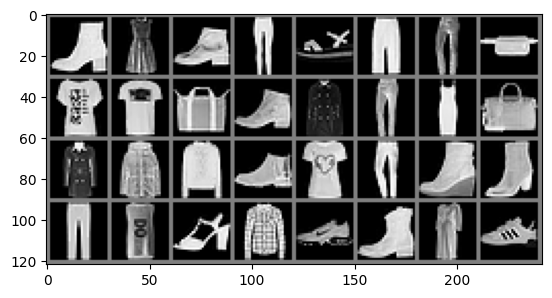

Ankle boot Dress Ankle boot Trouser Sandal Trouser Trouser   Bag


In [24]:
import matplotlib.pyplot as plt
import numpy as np


def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()
    
dataiter = iter(trainloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % classes[labels[j]] for j in range(8)))

# Building the model with no regularization

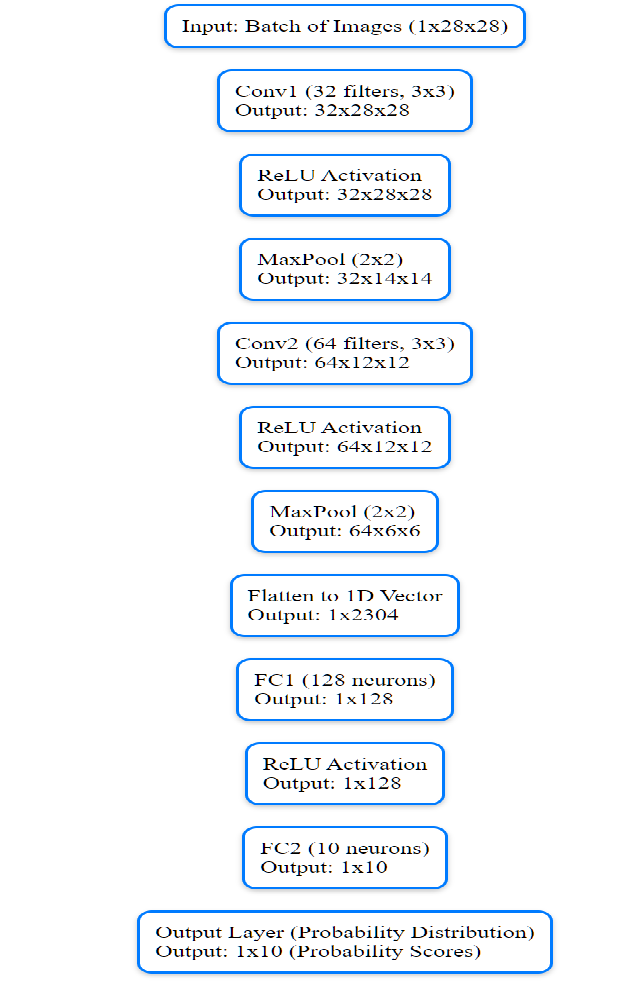

In [25]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    # we create a custom neural network class called Net by inheriting from nn.Module. 
    # Inside the class, we define the layers of the neural network in the __init__ method, 
    # and the forward pass is implemented in the forward method.


    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        # The first Conv2d layer takes an input channel of 1 (since Fashion MNIST images are grayscale), 
        # has 32 output channels, and uses a kernel size of 3x3. 
        
        self.conv2 = nn.Conv2d(32, 64, 3)
        # The second Conv2d layer takes 32 input channels (output channels of the previous layer), 
        # has 64 output channels, and uses a kernel size of 3x3. 
        
        
        self.pool = nn.MaxPool2d(2,2)
        #  MaxPool2d is the max-pooling layer used for downsampling, 
        # and it has a kernel size of 2x2 and a stride of 2. 
        
        
        self.fc1 = nn.Linear(64*12*12, 128)
        # The first Linear layer has an input size of 64 * 12 * 12, 
        # which is the result of flattening the output of the last convolutional layer. 
        
        # Number of elements in flattened tensor = batch_size * channels * height * width
        # Number of elements in flattened tensor = batch_size * 64 * 12 * 12
        # Dense layer self.fc1 takes an input with 64 * 12 * 12 elements and has 128 output units (neurons).
        
        self.fc2 = nn.Linear(128,10)
        # It has 128 output units. The last Linear layer has an input size of 128 and 10 output units, 
        # representing the 10 classes of Fashion MNIST.
        
        
    
    def forward(self, x):
        # In the forward method, we specify the flow of data through the neural network. 
        
        
        x = F.relu(self.conv1(x))
        # The input x first goes through the first convolutional layer with ReLU activation (F.relu). 
        
        
        x = self.pool(F.relu(self.conv2(x)))
        # Then, it goes through the max-pooling layer after applying ReLU to the output of the second convolutional layer. 
        
        
        x = x.view(-1, 64*12*12)
        # Next, the output is flattened using x.view, which reshapes the output 
        # tensor to have a batch dimension (-1) and a flat feature vector. 
        
        
        x = F.relu(self.fc1(x))
        # Then, it goes through two fully connected layers with ReLU activation for the hidden layer. 

        
        x = self.fc2(x)
        # Finally, the output is passed through the last fully connected layer with no activation (logits) and returned.


        
        return x
    
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

### Import loss function and optimizer


1. `criterion = nn.CrossEntropyLoss()`: This line **defines the loss function** used for training the CNN. The CrossEntropyLoss is commonly used for multi-class classification problems. It combines the softmax activation and the negative log-likelihood loss, which helps to optimize the model's parameters to correctly classify the input samples into their respective classes.

2. `optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)`: This line **defines the optimization algorithm** used to update the model's parameters during training. In this case, it uses **Stochastic Gradient Descent (SGD)** as the optimizer. Let's break down the arguments:

   - `net.parameters()`: This provides the parameters of the neural network (**weights and biases**) that need to be optimized during training. **The optimizer will update these parameters to minimize the loss function.**
   
   - `lr=0.001`: This argument sets the learning rate, which controls the step size at which the optimizer adjusts the model's parameters. A smaller learning rate means smaller steps and slower convergence, while a larger learning rate may lead to overshooting and instability. The value of 0.001 is a commonly used initial learning rate, but it may need tuning for specific tasks.
   
   - `momentum=0.9`: This argument adds momentum to the optimization process, which helps the optimizer to keep moving in the same direction as previous steps, thus accelerating convergence. The value of 0.9 is a commonly used momentum value, but again, it can be tuned depending on the problem.



In [26]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr= 0.001, momentum = 0.9)

In [27]:
epochs = 25
# epochs: This variable holds the number of times the entire dataset will be passed through the model during training. 
#In this case, it's set to 25.




epoch_log = []
loss_log = []
accuracy_log = []
#These lists will store the training progress information for each epoch, 
# such as epoch number, loss, and accuracy.




for epoch in range(epochs):
    print(f"Starting epoch no. {epoch}")
    # This loop will iterate through each epoch (from 0 to 24, as there are 25 epochs).

    
    
    
    running_loss = 0.00
    # running_loss: This variable will keep track of the total loss of the model during each epoch. 
    # It is initialized to 0.0 at the start of each epoch.

    
    for i,data in enumerate(trainloader, 0):
        # This loop iterates through mini-batches of the training dataset.
        # i: It holds the index of the current mini-batch.


        inputs, labels = data
        # data: It contains a mini-batch of training data, which includes inputs (images) and corresponding labels.

        
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        # These lines move the data to the GPU (if available) for faster computation using the to() method.

        
        
        optimizer.zero_grad()
        # This line clears any previously stored gradients. 
        # Gradients need to be cleared before calculating new gradients in each mini-batch.

        
        
        outputs = net(inputs)
        # The inputs (images) are passed through the model (net) to get the predicted outputs.

        
        
        
        loss = criterion(outputs, labels)
        # The loss is calculated by comparing the predicted outputs to the 
        # ground truth labels using the specified criterion (CrossEntropyLoss in this case).

        
        loss.backward()
        # This line computes the gradients of the loss with respect to the model's parameters, 
        # which allows us to perform backpropagation to update the model.

        optimizer.step()
        #This line updates the model's parameters based on the computed gradients, 
        # effectively performing the optimization step.
        


        running_loss += loss.item()
        # The value of the loss for the current mini-batch is added to the running_loss, 
        # which keeps track of the total loss over mini-batches in the current epoch.

        
        
        
        
        if i%100 == 99:
            # This block is inside the loop over mini-batches, 
            # it is used to monitor the training progress after every 100 mini-batches.
            # The if i % 100 == 99: condition checks if 100 mini-batches have been processed (since i starts from 0).
            # Inside this block, we calculate the accuracy of the model on the test dataset to see 
            # how well the model is performing at this point.
            


            

            correct = 0
            total = 0
            
            with torch.no_grad():
                # statement ensures that no gradients are calculated during this evaluation
                # as we are not updating the model here.
                # The loop over the test dataset calculates the number of correct predictions 
                # and the total number of samples in the test dataset to compute the accuracy.
                
                totals = 0  # Initialize the variable 'totals' before the loop starts



                for data in testloader:
                    # This loop iterates through mini-batches of the test dataset using the testloader.

                    
                    images, labels = data
                    # data contains a mini-batch of test data, which includes 
                    # images (input images) and labels (ground truth labels).

                    
                    
                    
                    images = images.to(device)
                    labels = labels.to(device)
                    # These lines move the test data to the GPU (if available) 
                    # for faster evaluation using the to() method.
                    
                    

                    outputs = net(images)
                    # outputs = net(images): The input images (images) are passed through the trained model (net) 
                    # to get the predicted outputs.

                    
                    
                    
                    _, predicted = torch.max(outputs.data, 1)
                    # The torch.max() function is used to find the maximum value along with its index (the predicted class index)
                    # along the dimension 1 (columns). 
                    # The underscore _ before predicted is used to discard the maximum values 
                    # as we are interested only in the predicted class indices.

                    
                    
                    totals += labels.size(0)
                    # totals is a running sum that keeps track of the total number of samples in the test dataset.
                    # labels.size(0) gives the batch size of the current mini-batch, which is added to totals.


                    
                    
                    correct += (predicted == labels).sum().item()
                    #(predicted == labels).sum().item() calculates the number of correct predictions 
                    # in the current mini-batch and adds it to correct.
                    # correct is a running sum that keeps track of the number of correct predictions 
                    # made by the model on the test dataset.

                    
                    
                accuracy = 100*correct/totals
                epoch_num = epoch+1
                actual_loss = running_loss/50
                
                print(f"Epoch no. {epoch_num},Mini- batches completed:{(i+1)} Accuracy: {accuracy}, Actual Loss:{actual_loss}")
                # The accuracy, epoch number (epoch_num), and the actual_loss (running_loss divided by 50) 
                # are printed for monitoring the training progress.

                
                
                running_loss = 0.0
                # running_loss is reset to 0.0 after printing the progress for the current batch.

                
                
                
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)
    # After completing an epoch (looping through all mini-batches)
    # we store the epoch number (epoch_num), actual_loss, and accuracy in their 
    # respective lists (epoch_log, loss_log, accuracy_log) for later analysis and visualization.
    
    
    
    
    


print("Hoorrray!!!   Finished Training!!!!")

Starting epoch no. 0
Epoch no. 1,Mini- batches completed:100 Accuracy: 65.84, Actual Loss:3.772522735595703
Epoch no. 1,Mini- batches completed:200 Accuracy: 69.1, Actual Loss:1.6959220790863037
Epoch no. 1,Mini- batches completed:300 Accuracy: 70.7, Actual Loss:1.4235588333010674


KeyboardInterrupt: 

# Get Final accuracy

In [16]:
correct = 0
total = 0
# Initialize variables correct and total to zero. 
#These variables will be used to keep track of the number of correct predictions 
# and the total number of samples in the test dataset.



with torch.no_grad():
    #block to turn off gradient computation. 
    # This is done because we don't need to compute gradients 
    # during the evaluation phase, which can save memory and computation time.


    
    for data in testloader:
        # Start a loop over the testloader
        # which is an iterator that provides mini-batches of test data. 
        


        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        # Use torch.max() to get the index of the maximum value along dimension 1 of the outputs tensor. 
        # This gives us the predicted class labels for each image in the mini-batch.

        
        

        total += labels.size(0)
        # Update the total variable by adding the batch size 
        # i.e., the number of samples in the current mini-batch) 
        # to keep track of the total number of samples seen so far.
        
        


        correct += (predicted == labels).sum().item()
        # Calculate the number of correct predictions in the current mini-batch 
        # by comparing the predicted labels with the ground truth labels. 
        #(predicted == labels) creates a Boolean tensor with True 
        # where the predictions are correct and False where they are incorrect. 
        # .sum().item() sums up the True values, giving us the number of correct predictions in the mini-batch.

        
        

    
accuracy = 100*correct/total
print(f"Final Accuracy: {accuracy}")

Final Accuracy: 91.31


# Performance Plot

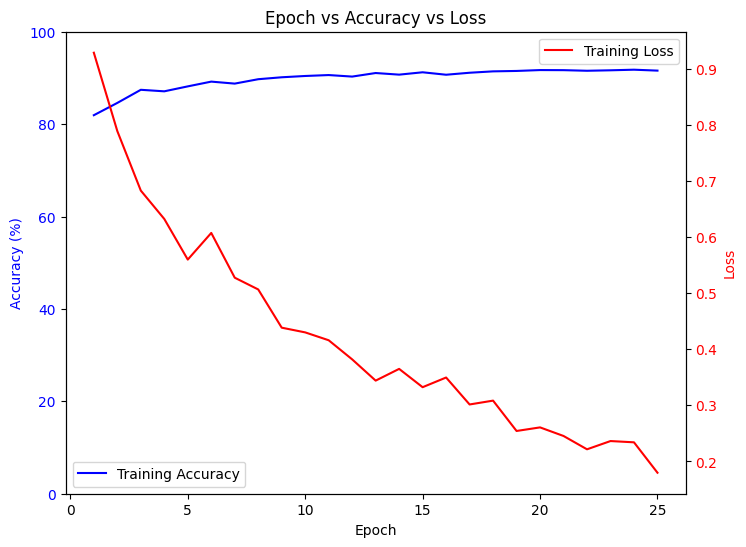

In [20]:
import matplotlib.pyplot as plt

# Create a single figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the accuracy on the primary y-axis
ax.plot(epoch_log, accuracy_log, label='Training Accuracy', color='b')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (%)', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_ylim(0, 100)  # Set y-axis limit for accuracy

# Create a twin y-axis on the right side for plotting loss
ax_loss = ax.twinx()
ax_loss.plot(epoch_log, loss_log, label='Training Loss', color='r')
ax_loss.set_ylabel('Loss', color='r')
ax_loss.tick_params(axis='y', labelcolor='r')

# Set titles and legends
ax.set_title('Epoch vs Accuracy vs Loss')
ax.legend(loc='lower left')
ax_loss.legend(loc='upper right')

# Show the combined plot
plt.show()


# Save the model weights

In [21]:
path = "./fashion_mnist_pytorch_cnn.pth"
torch.save(net.state_dict(), path)

# Apply augmentation to the dataset

In [23]:
import torchvision.transforms as transforms

# Define 10 different augmentations
augmentations = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomGrayscale(p=0.5),
    transforms.GaussianBlur(kernel_size=3),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),
    transforms.RandomPerspective(),
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0), ratio=(0.8, 1.2)),
]

# Apply each augmentation and create new datasets
augmented_datasets = []
for augmentation in augmentations:
    transformed_dataset = torchvision.datasets.FashionMNIST(
        root='/data',
        train=True,
        download=True,
        transform=transforms.Compose([augmentation, transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    )
    augmented_datasets.append(transformed_dataset)


Original Images:


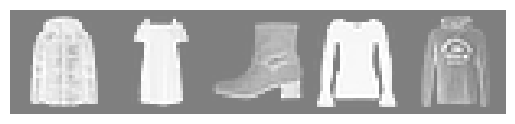

Augmented Images:


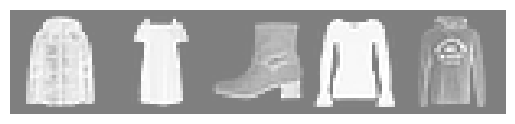

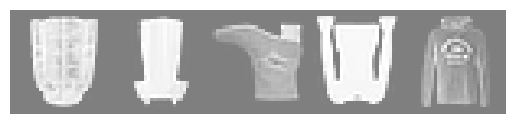

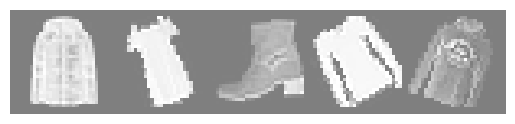

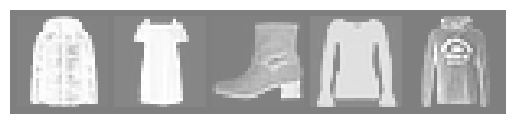

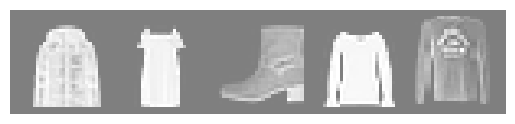

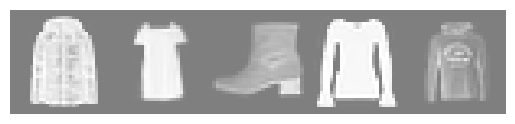

C:\Program Files\Python39\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


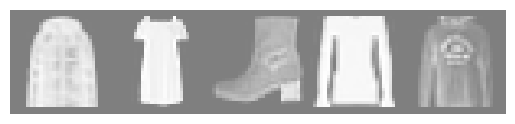

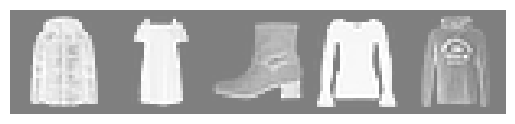

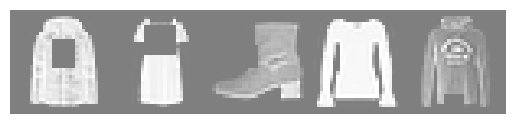

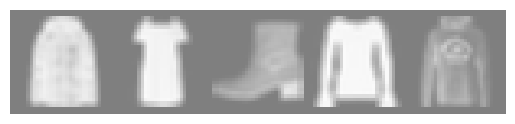

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST

# Define the data transformation (without normalization) for visualization
transform_visualize = transforms.Compose([transforms.ToTensor()])

# Load the Fashion MNIST dataset without normalization for visualization
dataset_visualize = FashionMNIST(root='/data', train=True, download=True, transform=transform_visualize)

# Create a data loader for visualization
dataloader_visualize = torch.utils.data.DataLoader(dataset_visualize, batch_size=5, shuffle=True)

# Function to show images
def imshow(image):
    image = image / 2 + 0.5     # Unnormalize
    np_image = image.numpy()
    plt.imshow(np.transpose(np_image, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Get the first batch of images and labels from the data loader
images, labels = next(iter(dataloader_visualize))

# Show the original images
print("Original Images:")
imshow(torchvision.utils.make_grid(images))

# Augmentation transformations
augment_transforms = [
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1), scale=(0.9, 1.1), shear=0.2),
    transforms.RandomPerspective(distortion_scale=0.2, p=0.5),
    transforms.RandomResizedCrop(28, scale=(0.8, 1.0)),
    transforms.RandomGrayscale(p=0.2),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.2)),
    transforms.GaussianBlur(kernel_size=(3, 3), sigma=(0.1, 2.0))
]

# Show augmented versions of the images
print("Augmented Images:")
for transform in augment_transforms:
    augmented_images = torch.stack([transform(image) for image in images])
    imshow(torchvision.utils.make_grid(augmented_images))


# Do the trainng with regularization

In [41]:
import torchvision.transforms as transforms

# Define a data augmentation pipeline
aug_transform = transforms.Compose([
    transforms.RandomResizedCrop(28),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(30),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
    transforms.RandomAffine(degrees=15, translate=(0.1, 0.1), scale=(0.9, 1.1)),
    transforms.RandomPerspective(distortion_scale=0.3),
    transforms.GaussianBlur(kernel_size=3),
    transforms.RandomGrayscale(p=0.2),
    transforms.ToTensor(),  # Move ToTensor() before any transformations that may modify the image shape
    transforms.Normalize(mean=[0.5], std=[0.5])
])


In [42]:
train = torchvision.datasets.FashionMNIST(root= '/data',
                                         train = True,
                                         download = True,
                                         transform = aug_transform)

test = torchvision.datasets.FashionMNIST(root= '/data',
                                         train = False,
                                         download = True,
                                         transform = aug_transform)

trainloader = torch.utils.data.DataLoader(train, batch_size = 32, shuffle = True, num_workers = 2)
# trainloader: This is the data loader for the training set.
# torch.utils.data.DataLoader: This is the class used to create data loaders in PyTorch.
# train: This is the training dataset (in this case, the Fashion MNIST training dataset) 
# that you previously loaded using torchvision.datasets.FashionMNIST.
# batch_size=32: This specifies the batch size, which means that during training, 
# the data will be divided into batches of 32 samples each. The model will process these batches one by one in each iteration.
# shuffle=True: This indicates that the data should be shuffled before each epoch. 
# Shuffling the data ensures that the model sees different samples in each epoch and helps in better convergence during training.
# num_workers=2: This specifies the number of worker threads to use for data loading. 
# Setting num_workers to a value greater than 0 enables multi-threaded data loading, which can speed up the data loading process, especially when dealing with large datasets.




testloader = torch.utils.data.DataLoader(test, batch_size = 32, shuffle = False, num_workers = 2)


# Create NN pipeline with BatchNormalization and Dropout

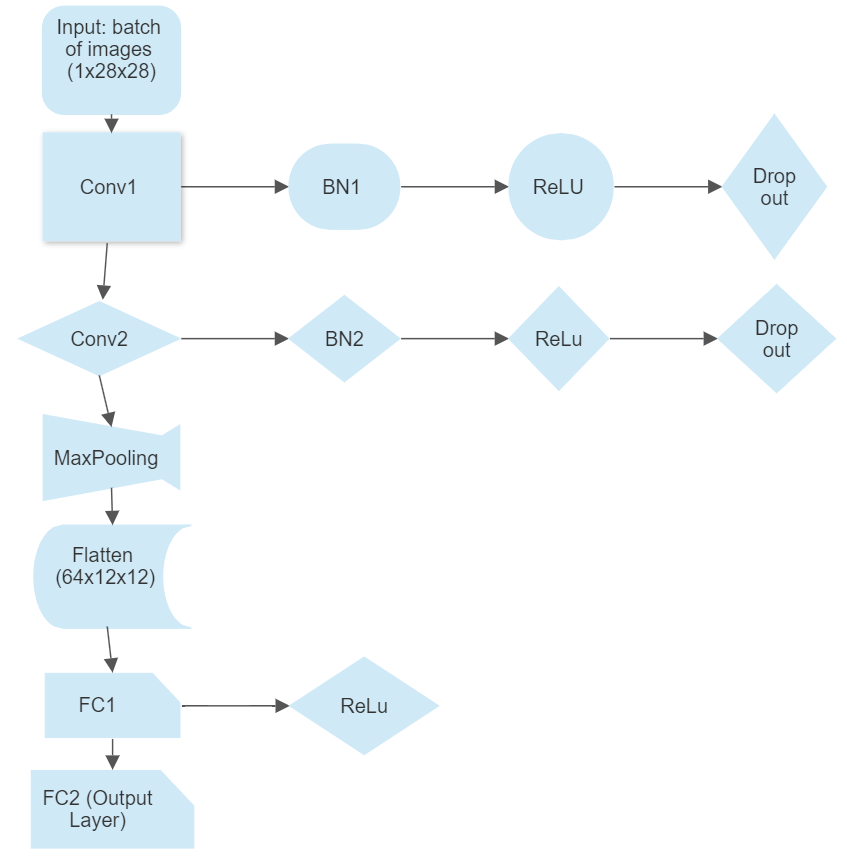

In [43]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    # we create a custom neural network class called Net by inheriting from nn.Module. 
    # Inside the class, we define the layers of the neural network in the __init__ method, 
    # and the forward pass is implemented in the forward method.


    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)
        # The first Conv2d layer takes an input channel of 1 (since Fashion MNIST images are grayscale), 
        # has 32 output channels, and uses a kernel size of 3x3. 
        
        
        
        self.bn1 = nn.BatchNorm2d(32)
        # nn.BatchNorm2d(out_channels): This creates a BatchNorm2d layer that normalizes the input tensor 
        # Along the channel dimension (C) for each element in the mini-batch. 
        # The out_channels parameter should be set to the number of output channels of the previous convolutional layer.


        
        
        self.conv2 = nn.Conv2d(32, 64, 3)
        # The second Conv2d layer takes 32 input channels (output channels of the previous layer), 
        # has 64 output channels, and uses a kernel size of 3x3. 
        
        
        
        self.bn2 = nn.BatchNorm2d(64) 
        
        self.pool = nn.MaxPool2d(2,2)
        #  MaxPool2d is the max-pooling layer used for downsampling, 
        # and it has a kernel size of 2x2 and a stride of 2. 
        
        
        self.fc1 = nn.Linear(64*12*12, 128)
        # The first Linear layer has an input size of 64 * 12 * 12, 
        # which is the result of flattening the output of the last convolutional layer. 
        
        # Number of elements in flattened tensor = batch_size * channels * height * width
        # Number of elements in flattened tensor = batch_size * 64 * 12 * 12
        # Dense layer self.fc1 takes an input with 64 * 12 * 12 elements and has 128 output units (neurons).
        
        self.fc2 = nn.Linear(128,10)
        # It has 128 output units. The last Linear layer has an input size of 128 and 10 output units, 
        # representing the 10 classes of Fashion MNIST.
        
        
        self.dropout = nn.Dropout(0.2)
        # nn: It stands for the torch.nn module, which provides various neural network layers and functionalities in PyTorch.
        # nn.Dropout: This is the class that represents the dropout layer in PyTorch.
        # (0.2): This is the dropout probability. In this case, it is set to 0.2, 
        # which means that during training, the dropout layer will randomly set 20% of the input elements to zero.


        
        
    
    def forward(self, x):
        # In the forward method, we specify the flow of data through the neural network. 
        
        
        x = F.relu(self.bn1(self.conv1(x)))
        # The input x first goes through the first convolutional layer with ReLU activation (F.relu). 
        
        x = self.dropout(x)
        
        x = self.dropout(F.relu(self.bn2(self.conv2(x))))
        # Then, it goes through the max-pooling layer after applying ReLU to the output of the second convolutional layer. 
        
        x = self.pool(x)
        x = x.view(-1, 64*12*12)
        # Next, the output is flattened using x.view, which reshapes the output 
        # tensor to have a batch dimension (-1) and a flat feature vector. 
        
        
        x = F.relu(self.fc1(x))
        # Then, it goes through two fully connected layers with ReLU activation for the hidden layer. 

        
        x = self.fc2(x)
        # Finally, the output is passed through the last fully connected layer with no activation (logits) and returned.


        
        return x
    
net = Net()
net.to(device)

Net(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)

# Add L2 Regularization (Weight Decay)

In [44]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr= 0.001, momentum = 0.9, weight_decay = 0.001)

In [45]:
epochs = 25
# epochs: This variable holds the number of times the entire dataset will be passed through the model during training. 
#In this case, it's set to 25.




epoch_log = []
loss_log = []
accuracy_log = []
#These lists will store the training progress information for each epoch, 
# such as epoch number, loss, and accuracy.




for epoch in range(epochs):
    print(f"Starting epoch no. {epoch}")
    # This loop will iterate through each epoch (from 0 to 24, as there are 25 epochs).

    
    
    
    running_loss = 0.00
    # running_loss: This variable will keep track of the total loss of the model during each epoch. 
    # It is initialized to 0.0 at the start of each epoch.

    
    for i,data in enumerate(trainloader, 0):
        # This loop iterates through mini-batches of the training dataset.
        # i: It holds the index of the current mini-batch.


        inputs, labels = data
        # data: It contains a mini-batch of training data, which includes inputs (images) and corresponding labels.

        
        
        inputs = inputs.to(device)
        labels = labels.to(device)
        # These lines move the data to the GPU (if available) for faster computation using the to() method.

        
        
        optimizer.zero_grad()
        # This line clears any previously stored gradients. 
        # Gradients need to be cleared before calculating new gradients in each mini-batch.

        
        
        outputs = net(inputs)
        # The inputs (images) are passed through the model (net) to get the predicted outputs.

        
        
        
        loss = criterion(outputs, labels)
        # The loss is calculated by comparing the predicted outputs to the 
        # ground truth labels using the specified criterion (CrossEntropyLoss in this case).

        
        loss.backward()
        # This line computes the gradients of the loss with respect to the model's parameters, 
        # which allows us to perform backpropagation to update the model.

        optimizer.step()
        #This line updates the model's parameters based on the computed gradients, 
        # effectively performing the optimization step.
        


        running_loss += loss.item()
        # The value of the loss for the current mini-batch is added to the running_loss, 
        # which keeps track of the total loss over mini-batches in the current epoch.

        
        
        
        
        if i%100 == 99:
            # This block is inside the loop over mini-batches, 
            # it is used to monitor the training progress after every 100 mini-batches.
            # The if i % 100 == 99: condition checks if 100 mini-batches have been processed (since i starts from 0).
            # Inside this block, we calculate the accuracy of the model on the test dataset to see 
            # how well the model is performing at this point.
            


            

            correct = 0
            total = 0
            
            with torch.no_grad():
                # statement ensures that no gradients are calculated during this evaluation
                # as we are not updating the model here.
                # The loop over the test dataset calculates the number of correct predictions 
                # and the total number of samples in the test dataset to compute the accuracy.
                
                totals = 0  # Initialize the variable 'totals' before the loop starts



                for data in testloader:
                    # This loop iterates through mini-batches of the test dataset using the testloader.

                    
                    images, labels = data
                    # data contains a mini-batch of test data, which includes 
                    # images (input images) and labels (ground truth labels).

                    
                    
                    
                    images = images.to(device)
                    labels = labels.to(device)
                    # These lines move the test data to the GPU (if available) 
                    # for faster evaluation using the to() method.
                    
                    

                    outputs = net(images)
                    # outputs = net(images): The input images (images) are passed through the trained model (net) 
                    # to get the predicted outputs.

                    
                    
                    
                    _, predicted = torch.max(outputs.data, 1)
                    # The torch.max() function is used to find the maximum value along with its index (the predicted class index)
                    # along the dimension 1 (columns). 
                    # The underscore _ before predicted is used to discard the maximum values 
                    # as we are interested only in the predicted class indices.

                    
                    
                    totals += labels.size(0)
                    # totals is a running sum that keeps track of the total number of samples in the test dataset.
                    # labels.size(0) gives the batch size of the current mini-batch, which is added to totals.


                    
                    
                    correct += (predicted == labels).sum().item()
                    #(predicted == labels).sum().item() calculates the number of correct predictions 
                    # in the current mini-batch and adds it to correct.
                    # correct is a running sum that keeps track of the number of correct predictions 
                    # made by the model on the test dataset.

                    
                    
                accuracy = 100*correct/totals
                epoch_num = epoch+1
                actual_loss = running_loss/50
                
                print(f"Epoch no. {epoch_num},Mini- batches completed:{(i+1)} Accuracy: {accuracy}, Actual Loss:{actual_loss}")
                # The accuracy, epoch number (epoch_num), and the actual_loss (running_loss divided by 50) 
                # are printed for monitoring the training progress.

                
                
                running_loss = 0.0
                # running_loss is reset to 0.0 after printing the progress for the current batch.

                
                
                
    epoch_log.append(epoch_num)
    loss_log.append(actual_loss)
    accuracy_log.append(accuracy)
    # After completing an epoch (looping through all mini-batches)
    # we store the epoch number (epoch_num), actual_loss, and accuracy in their 
    # respective lists (epoch_log, loss_log, accuracy_log) for later analysis and visualization.
    
    
    
    
    


print("Hoorrray!!!   Finished Training!!!!")

Starting epoch no. 0
Epoch no. 1,Mini- batches completed:100 Accuracy: 29.23, Actual Loss:4.063110733032227
Epoch no. 1,Mini- batches completed:200 Accuracy: 32.94, Actual Loss:3.673207948207855
Epoch no. 1,Mini- batches completed:300 Accuracy: 36.36, Actual Loss:3.4340602803230285
Epoch no. 1,Mini- batches completed:400 Accuracy: 37.28, Actual Loss:3.3620333766937254
Epoch no. 1,Mini- batches completed:500 Accuracy: 38.71, Actual Loss:3.239897668361664
Epoch no. 1,Mini- batches completed:600 Accuracy: 41.42, Actual Loss:3.1879344511032106
Epoch no. 1,Mini- batches completed:700 Accuracy: 40.95, Actual Loss:3.21956015586853
Epoch no. 1,Mini- batches completed:800 Accuracy: 42.27, Actual Loss:3.1656195235252382
Epoch no. 1,Mini- batches completed:900 Accuracy: 41.88, Actual Loss:3.047514615058899
Epoch no. 1,Mini- batches completed:1000 Accuracy: 43.18, Actual Loss:3.0167121124267577
Epoch no. 1,Mini- batches completed:1100 Accuracy: 44.97, Actual Loss:3.036062638759613
Epoch no. 1,Mini

Epoch no. 6,Mini- batches completed:300 Accuracy: 53.27, Actual Loss:2.44409991979599
Epoch no. 6,Mini- batches completed:400 Accuracy: 53.03, Actual Loss:2.574958026409149
Epoch no. 6,Mini- batches completed:500 Accuracy: 52.78, Actual Loss:2.5768984377384188
Epoch no. 6,Mini- batches completed:600 Accuracy: 52.8, Actual Loss:2.534343030452728
Epoch no. 6,Mini- batches completed:700 Accuracy: 54.67, Actual Loss:2.533267685174942
Epoch no. 6,Mini- batches completed:800 Accuracy: 53.94, Actual Loss:2.5635621309280396
Epoch no. 6,Mini- batches completed:900 Accuracy: 52.57, Actual Loss:2.484202741384506
Epoch no. 6,Mini- batches completed:1000 Accuracy: 53.63, Actual Loss:2.505330090522766
Epoch no. 6,Mini- batches completed:1100 Accuracy: 53.34, Actual Loss:2.487208993434906
Epoch no. 6,Mini- batches completed:1200 Accuracy: 51.99, Actual Loss:2.566486893892288
Epoch no. 6,Mini- batches completed:1300 Accuracy: 54.23, Actual Loss:2.5258689200878144
Epoch no. 6,Mini- batches completed:14

Epoch no. 11,Mini- batches completed:500 Accuracy: 57.01, Actual Loss:2.3327193534374238
Epoch no. 11,Mini- batches completed:600 Accuracy: 55.94, Actual Loss:2.4267984783649443
Epoch no. 11,Mini- batches completed:700 Accuracy: 56.78, Actual Loss:2.3916069185733795
Epoch no. 11,Mini- batches completed:800 Accuracy: 56.56, Actual Loss:2.3307903671264647
Epoch no. 11,Mini- batches completed:900 Accuracy: 56.17, Actual Loss:2.3670807671546936
Epoch no. 11,Mini- batches completed:1000 Accuracy: 55.85, Actual Loss:2.299498485326767
Epoch no. 11,Mini- batches completed:1100 Accuracy: 57.25, Actual Loss:2.3522771072387694
Epoch no. 11,Mini- batches completed:1200 Accuracy: 56.15, Actual Loss:2.3935428142547606
Epoch no. 11,Mini- batches completed:1300 Accuracy: 57.17, Actual Loss:2.322360798120499
Epoch no. 11,Mini- batches completed:1400 Accuracy: 55.27, Actual Loss:2.390387269258499
Epoch no. 11,Mini- batches completed:1500 Accuracy: 56.77, Actual Loss:2.401618970632553
Epoch no. 11,Mini- 

Epoch no. 16,Mini- batches completed:600 Accuracy: 57.67, Actual Loss:2.2717424273490905
Epoch no. 16,Mini- batches completed:700 Accuracy: 57.11, Actual Loss:2.2645920968055724
Epoch no. 16,Mini- batches completed:800 Accuracy: 57.94, Actual Loss:2.2109906697273254
Epoch no. 16,Mini- batches completed:900 Accuracy: 58.0, Actual Loss:2.2812814998626707
Epoch no. 16,Mini- batches completed:1000 Accuracy: 58.89, Actual Loss:2.2615928542613983
Epoch no. 16,Mini- batches completed:1100 Accuracy: 57.31, Actual Loss:2.2722074246406554
Epoch no. 16,Mini- batches completed:1200 Accuracy: 57.78, Actual Loss:2.2146020221710203
Epoch no. 16,Mini- batches completed:1300 Accuracy: 58.76, Actual Loss:2.296839324235916
Epoch no. 16,Mini- batches completed:1400 Accuracy: 58.69, Actual Loss:2.2370865678787233
Epoch no. 16,Mini- batches completed:1500 Accuracy: 58.18, Actual Loss:2.312547436952591
Epoch no. 16,Mini- batches completed:1600 Accuracy: 56.71, Actual Loss:2.2971490490436555
Epoch no. 16,Mini

Epoch no. 21,Mini- batches completed:700 Accuracy: 57.82, Actual Loss:2.2681191217899324
Epoch no. 21,Mini- batches completed:800 Accuracy: 59.6, Actual Loss:2.2678130984306337
Epoch no. 21,Mini- batches completed:900 Accuracy: 58.96, Actual Loss:2.193098257780075
Epoch no. 21,Mini- batches completed:1000 Accuracy: 60.44, Actual Loss:2.1692843770980836
Epoch no. 21,Mini- batches completed:1100 Accuracy: 60.05, Actual Loss:2.1592341458797453
Epoch no. 21,Mini- batches completed:1200 Accuracy: 60.72, Actual Loss:2.1569373214244845
Epoch no. 21,Mini- batches completed:1300 Accuracy: 59.09, Actual Loss:2.175258857011795
Epoch no. 21,Mini- batches completed:1400 Accuracy: 59.12, Actual Loss:2.2579943430423737
Epoch no. 21,Mini- batches completed:1500 Accuracy: 59.15, Actual Loss:2.2231508672237394
Epoch no. 21,Mini- batches completed:1600 Accuracy: 59.04, Actual Loss:2.192356653213501
Epoch no. 21,Mini- batches completed:1700 Accuracy: 59.3, Actual Loss:2.1584265887737275
Epoch no. 21,Mini-

# Performance plot

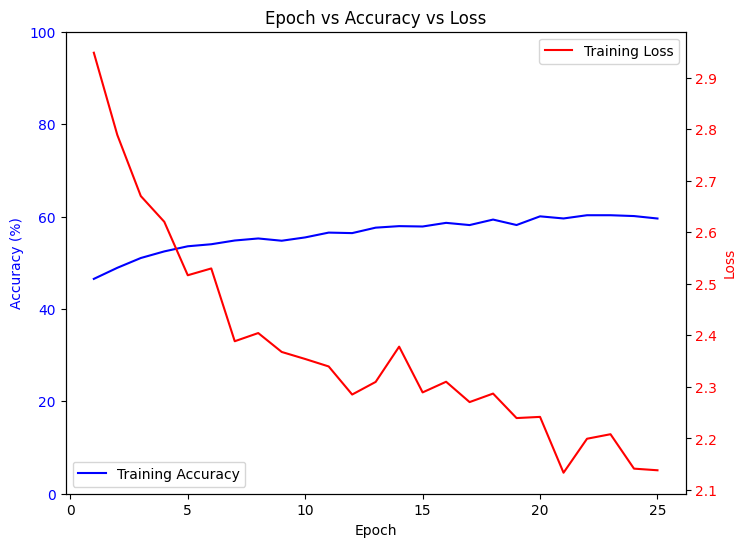

In [46]:
import matplotlib.pyplot as plt

# Create a single figure with a single subplot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the accuracy on the primary y-axis
ax.plot(epoch_log, accuracy_log, label='Training Accuracy', color='b')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy (%)', color='b')
ax.tick_params(axis='y', labelcolor='b')
ax.set_ylim(0, 100)  # Set y-axis limit for accuracy

# Create a twin y-axis on the right side for plotting loss
ax_loss = ax.twinx()
ax_loss.plot(epoch_log, loss_log, label='Training Loss', color='r')
ax_loss.set_ylabel('Loss', color='r')
ax_loss.tick_params(axis='y', labelcolor='r')

# Set titles and legends
ax.set_title('Epoch vs Accuracy vs Loss')
ax.legend(loc='lower left')
ax_loss.legend(loc='upper right')

# Show the combined plot
plt.show()
